In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
import torchvision.transforms as transforms
from PIL import Image
from imgaug import augmenters as iaa

In [2]:
def delete_random_patch(arr):
    
    num_patches = np.random.randint(0,12)
    patch_size = np.random.randint(17,20)
    for _ in range(num_patches):
        i,j = np.random.randint(0,96-patch_size),np.random.randint(0,96-patch_size)
        arr[i:i+patch_size, j:j+patch_size,:] = 0
    
    return arr


def new_background(label):
    
    new_image = train_back[np.random.randint(0,train_back.shape[0])]
    greyscale_image = np.mean(label, axis=2)
    mask = greyscale_image > 0
    new_image[mask,:] = label[mask,:]

    
    return new_image


In [3]:
test_noisy = np.load("./test_noisy_100.npy")
train_noisy = np.load("./train_noisy.npy")
train_clean = np.load("./train_clean.npy")
train_back= np.load("./train_background.npy")



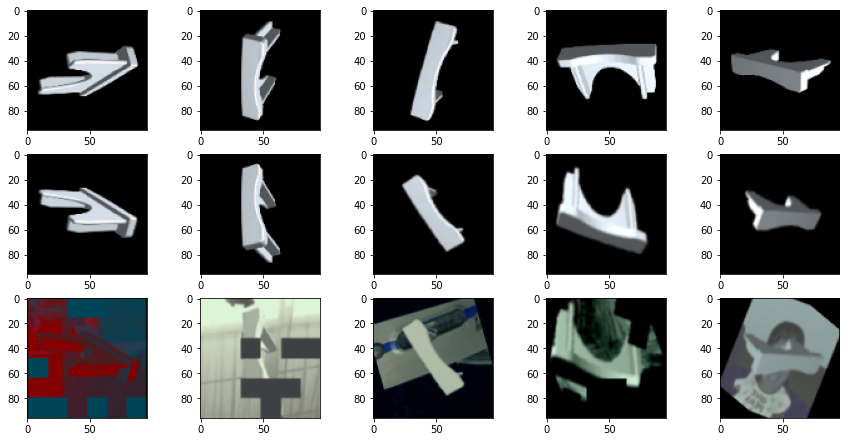

In [8]:
std_transform = iaa.Sequential([
                iaa.Sometimes(0.5, iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})),
                iaa.Sometimes(0.5, iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})),
                iaa.Sometimes(0.5, iaa.Affine(rotate=(-90, 90))),
                iaa.Sometimes(0.5, iaa.Affine(shear=(-25, 25))),
                iaa.Sometimes(0.5, iaa.Fliplr()),
                iaa.Sometimes(0.5, iaa.Flipud()),
                iaa.Sometimes(0.5, iaa.CropAndPad(percent=(-0.1, 0.1))),
                ], random_order=True)

soft_transform = iaa.Sequential([
                iaa.Sometimes(0.5,iaa.OneOf([
                    iaa.GaussianBlur((0, 1.5)),
                    iaa.AverageBlur(k=(2, 3)),
                ])),
                iaa.Sometimes(0.5,iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5),
                    iaa.CoarseDropout(
                        (0.03, 0.15), size_percent=(0.02, 0.03),
                        per_channel=0.2
                    ),
                ]),),
                # iaa.Sometimes(0.25,iaa.Superpixels(
                #         p_replace=(0, 0.5),
                #         n_segments=(20, 100)
                #     )),
                iaa.Sometimes(0.5,iaa.Invert(0.05, per_channel=True)),
                iaa.Sometimes(0.5,iaa.Add((-20, 20), per_channel=0.5)),
                iaa.Sometimes(0.5,iaa.Multiply((0.5, 1.5), per_channel=0.5)),
                iaa.Sometimes(0.5,iaa.LinearContrast((0.5, 2.0), per_channel=0.5)),
                iaa.Sometimes(0.5,iaa.Grayscale(alpha=(0.0, 1.0))),
                
                ], random_order=True)




def aug(idx):

    x = train_noisy[idx].astype(np.uint8)
    
    # plt.imshow(x.numpy().transpose((1,2,0)))
    # plt.show()
    y = train_clean[idx].astype(np.uint8)

    
    aug_all = std_transform.to_deterministic()
    x = aug_all.augment_image(x)
    y = aug_all.augment_image(y)

    x = soft_transform.augment_image(x)
    
    

    return x,y



idxs = np.random.randint(0,10000,size=5)

fig, ax = plt.subplots(3,len(idxs), figsize=(len(idxs)*3,7.5))

for i in range(len(idxs)):
    x,y = aug(idxs[i])
    
    ax[0,i].imshow(train_clean[idxs[i]])
    ax[1,i].imshow(y)
    ax[2,i].imshow(x)
    



